# Declaration of Originality

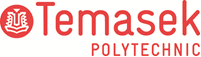

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
# [Cell 4] ## Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import joblib
from pathlib import Path

RANDOM_STATE = 42


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
import pandas as pd

# Load both datasets
df_mat = pd.read_excel("student-mat.xlsx")
df_por = pd.read_excel("student-por.xlsx")

# Add subject column (only difference between datasets)
df_mat["subject"] = "Math"
df_por["subject"] = "Portuguese"

# Merge (stack rows)
df = pd.concat([df_mat, df_por], ignore_index=True)

print("Merged dataset shape:", df.shape)
display(df.head())



Merged dataset shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
# Display data types
display(df.dtypes)

# Separate feature types
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
subject       object
dtype: object

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [5]:
## Check for missing data
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
display(missing)

print("Total duplicated rows:", df.duplicated().sum())



school        0
goout         0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
Dalc          0
sex           0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
activities    0
paid          0
famsup        0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
subject       0
dtype: int64

Total duplicated rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


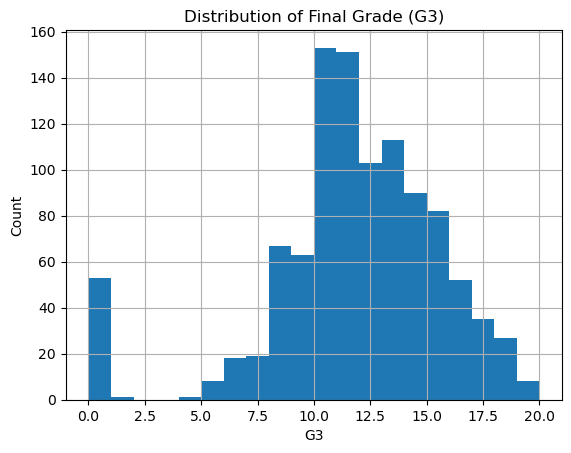

In [6]:
## Describe data distribution
# Summary statistics
display(df.describe(include="all").T)

import matplotlib.pyplot as plt

# Distribution of final grades (G3)
df["G3"].hist(bins=20)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Count")
plt.show()



## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

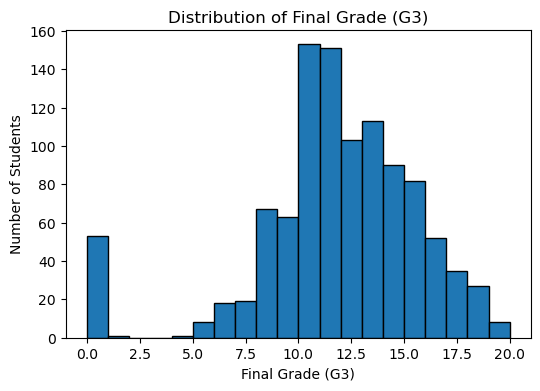

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

In [7]:
## Understanding distribution of target
import matplotlib.pyplot as plt

# Distribution of final grade (G3)
plt.figure(figsize=(6,4))
plt.hist(df["G3"], bins=20, edgecolor="black")
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

# Summary for interpretation
df["G3"].describe()


### 2.3.1.2 Understanding distribution of features

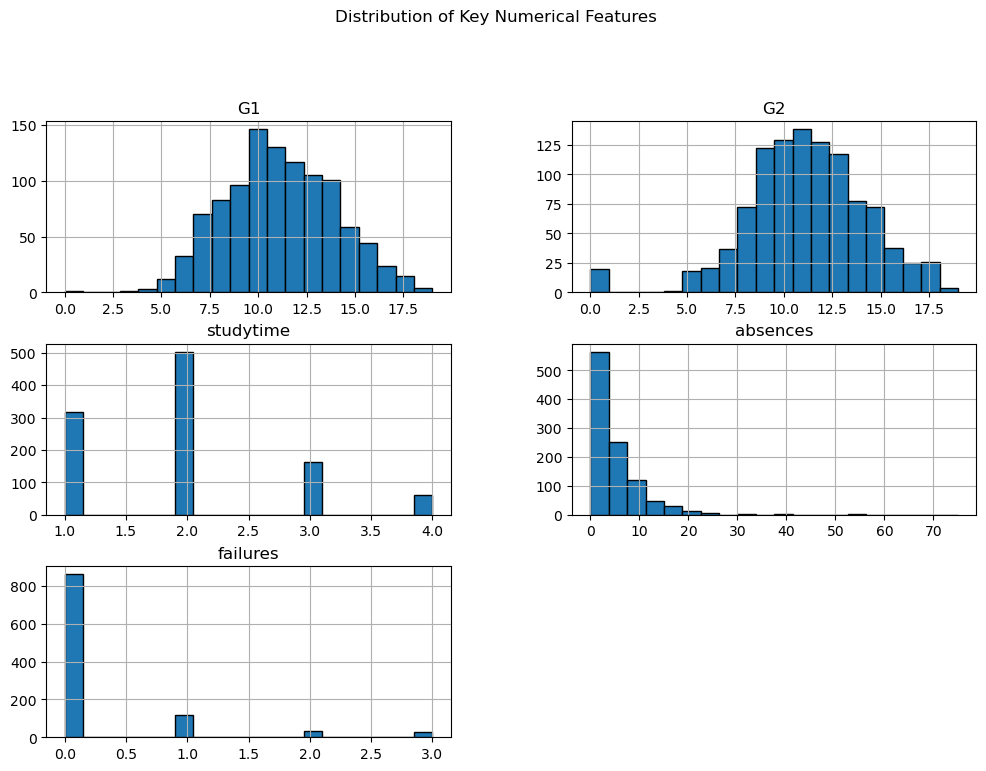

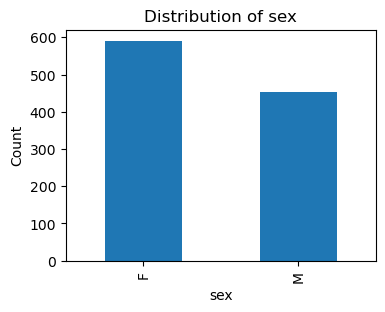

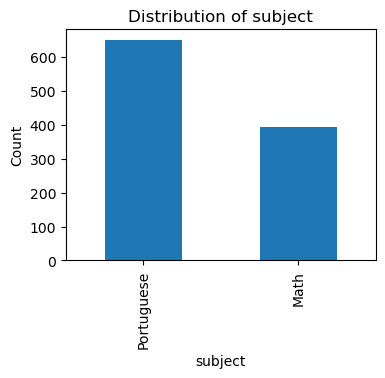

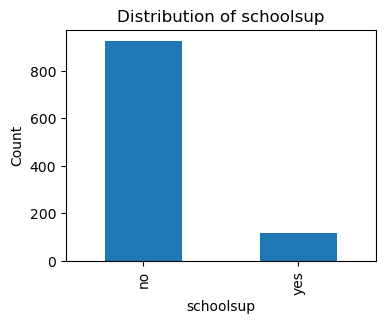

In [8]:
## Understanding distribution of features
# Select important numerical features
num_features = ["G1", "G2", "studytime", "absences", "failures"]

df[num_features].hist(
    figsize=(12,8),
    bins=20,
    edgecolor="black"
)
plt.suptitle("Distribution of Key Numerical Features", y=1.02)
plt.show()

# Example categorical distributions
for col in ["sex", "subject", "schoolsup"]:
    plt.figure(figsize=(4,3))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### 2.3.2 Understanding relationship between variables

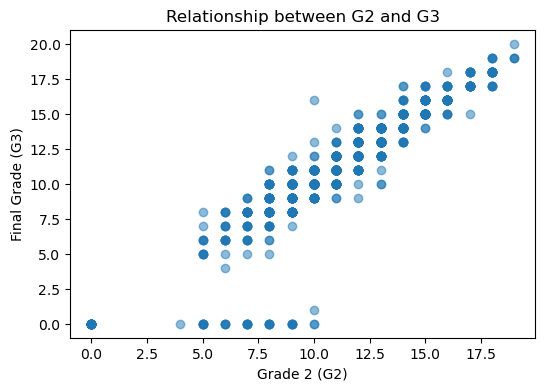

<Figure size 600x400 with 0 Axes>

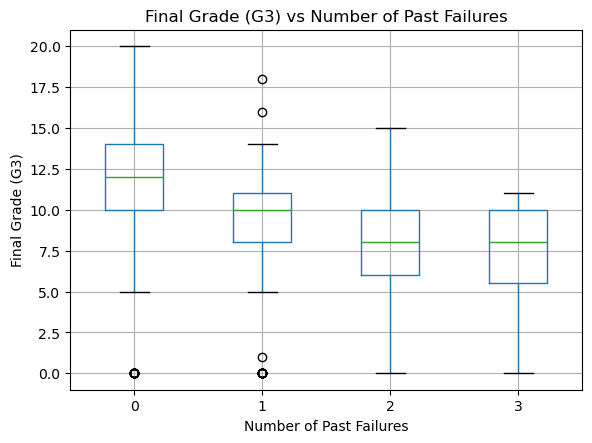

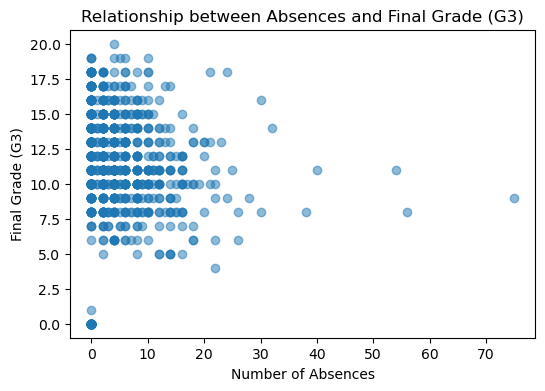

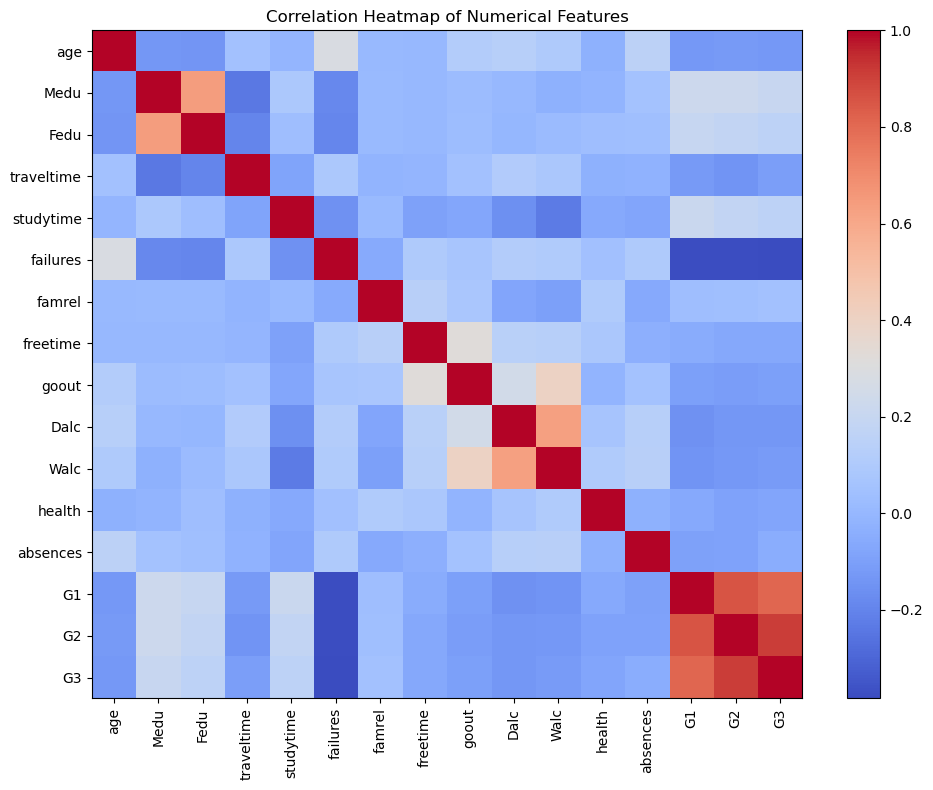

In [9]:
## Understanding relationship between variables
# Relationship between G1, G2 and G3
plt.figure(figsize=(6,4))
plt.scatter(df["G2"], df["G3"], alpha=0.5)
plt.title("Relationship between G2 and G3")
plt.xlabel("Grade 2 (G2)")
plt.ylabel("Final Grade (G3)")
plt.show()

plt.figure(figsize=(6,4))
df.boxplot(column="G3", by="failures")
plt.title("Final Grade (G3) vs Number of Past Failures")
plt.suptitle("")
plt.xlabel("Number of Past Failures")
plt.ylabel("Final Grade (G3)")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["absences"], df["G3"], alpha=0.5)
plt.title("Relationship between Absences and Final Grade (G3)")
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.show()

import numpy as np

corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()




# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Clean data
# Make a copy of the dataset so we don't accidentally modify the original
df_clean = df.copy()

# Remove duplicate rows if any
df_clean = df_clean.drop_duplicates()

# Sanity check: absences should not be negative
if "absences" in df_clean.columns:
    df_clean = df_clean[df_clean["absences"] >= 0]

print("Shape after cleaning:", df_clean.shape)

# Confirm no missing values
df_clean.isnull().sum()


Shape after cleaning: (1044, 34)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

## 3.2 Train-Test Split

In [11]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

# Create target variable (1 = at risk, 0 = not at risk)
df_clean["at_risk"] = (df_clean["G3"] < 10).astype(int)

# Drop G3 to prevent data leakage
df_clean = df_clean.drop(columns=["G3"])

# Separate features (X) and target (y)
X = df_clean.drop(columns=["at_risk"])
y = df_clean["at_risk"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (835, 33)
Test set size: (209, 33)


# 4. Modelling

### 4.2 Train Model

In [12]:
## Initialise and train model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols = X_train.select_dtypes(exclude="object").columns.tolist()

# Preprocessing: encode categorical features, keep numerical as-is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

# ----- Model 1: Logistic Regression (baseline) -----
log_reg_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

# Train Logistic Regression
log_reg_pipeline.fit(X_train, y_train)

print("Logistic Regression training completed.")


Logistic Regression training completed.


# 5. Model Evaluation

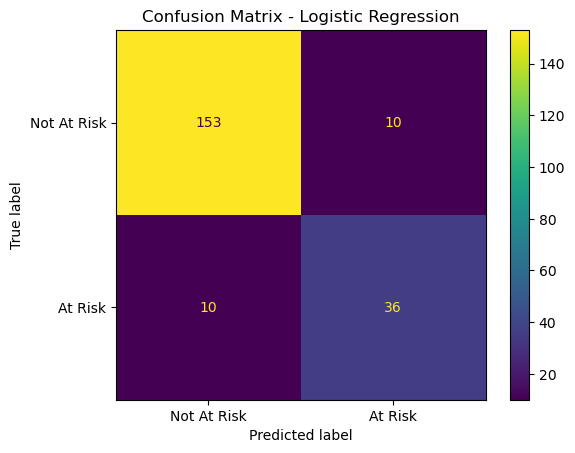

Accuracy : 0.9043062200956937
Precision: 0.782608695652174
Recall   : 0.782608695652174
F1-score : 0.782608695652174


In [13]:
## Evaluate model
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import matplotlib.pyplot as plt

# Predict on test data
y_pred = log_reg_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not At Risk", "At Risk"]
)

disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)




In [14]:
import joblib
from pathlib import Path
import pandas as pd

Path("artifacts").mkdir(exist_ok=True)

# Save the trained pipeline model (includes preprocessing!)
joblib.dump(log_reg_pipeline, "artifacts/model.joblib")

# Save a default row with the SAME columns as X_train
# This prevents Streamlit from missing columns.
default_row = X_train.iloc[[0]].copy()
joblib.dump(default_row, "artifacts/default_row.joblib")

print("Saved artifacts/model.joblib and artifacts/default_row.joblib")


Saved artifacts/model.joblib and artifacts/default_row.joblib


2026-02-09 11:37:42.857 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:37:42.859 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:37:43.261 
  command:

    streamlit run c:\Users\yu zhen\anaconda3\envs\mldp\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-09 11:37:43.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:37:43.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:37:43.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:37:43.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

In [15]:
## New data


## Predict


## Iterative model development


In [16]:
## Further feature engineering / feature selection